<a href="https://colab.research.google.com/github/alexbrill/tf-train/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np

import pandas as pd


import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

# IMPORT

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
ds = df.values

X = ds[:, 0:4].astype(float)
Y = ds[:, 4]

In [4]:
enc = LabelEncoder()
enc_Y = enc.fit_transform(Y)
dummy_Y = to_categorical(enc_Y)

# MODELING

In [107]:
def build_model(layer_sizes = []):
  model = Sequential()

  model.add(Dense(4, activation='relu'))

  for layer_size in layer_sizes:
    model.add(Dense(layer_size, activation='relu'))

  model.add(Dense(3, activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [167]:
def plot_train_vs_test(score_dict):

  plt.subplot(211)
  plt.plot(score_dict['accuracy'])
  plt.plot(score_dict['val_accuracy'])

  plt.subplot(212)
  plt.plot(score_dict['loss'])
  plt.plot(score_dict['val_loss'])

  plt.tight_layout()

In [193]:
def get_average_model_score(iter_num = 10):  
  scores_df = pd.DataFrame()

  for i in range(iter_num):
    model = build_model([6, 10])
    hist = model.fit(X, dummy_Y, epochs=100, batch_size=2, validation_split=0.1, verbose=0)

    scores_df[f'acc{i}'] = hist.history['accuracy']
    scores_df[f'loss{i}'] = hist.history['loss']
    scores_df[f'val_acc{i}'] = hist.history['val_accuracy']
    scores_df[f'val_loss{i}'] = hist.history['val_loss']

    print(f'Model {i} has been trained')

  return scores_df

In [194]:
scores_df = get_average_model_score()

scores_df.tail()

Model 0 has been trained
Model 1 has been trained
Model 2 has been trained
Model 3 has been trained
Model 4 has been trained
Model 5 has been trained
Model 6 has been trained
Model 7 has been trained
Model 8 has been trained
Model 9 has been trained


,acc0,loss0,val_acc0,val_loss0,acc1,loss1,val_acc1,val_loss1,acc2,loss2,val_acc2,val_loss2,acc3,loss3,val_acc3,val_loss3,acc4,loss4,val_acc4,val_loss4,acc5,loss5,val_acc5,val_loss5,acc6,loss6,val_acc6,val_loss6,acc7,loss7,val_acc7,val_loss7,acc8,loss8,val_acc8,val_loss8,acc9,loss9,val_acc9,val_loss9
0,0.111111,1.222439,0.133333,1.065524,0.303704,1.103236,0.0,1.051381,0.288889,1.230182,0.0,1.341906,0.029630,1.140164,0.0,1.149928,0.370370,1.038636,0.0,1.217218,0.585185,0.860196,1.000000,0.781043,0.370370,1.084810,0.0,1.111477,0.370370,1.136911,0.000000,1.058445,0.370370,1.103391,0.0,1.176023,0.407407,1.167608,0.0,0.984085
1,0.659259,0.980908,0.000000,1.057061,0.370370,1.061259,0.0,1.038871,0.192593,1.123096,0.0,1.347570,0.348148,1.111453,0.0,1.136705,0.370370,0.977331,0.0,1.227178,0.881481,0.628070,0.000000,0.759873,0.466667,0.941910,1.0,0.775617,0.511111,0.984555,0.066667,1.058406,0.340741,1.090852,0.0,1.216044,0.407407,1.088099,0.0,1.058107
2,0.718518,0.866329,0.000000,1.019732,0.370370,1.038132,0.0,1.031731,0.200000,1.109896,0.0,1.392397,0.414815,1.098356,0.0,1.150972,0.370370,0.922792,0.0,1.209494,0.911111,0.512546,0.133333,0.759654,0.666667,0.743284,1.0,0.563195,0.718518,0.858862,0.000000,1.036295,0.377778,1.078643,0.0,1.281376,0.370370,1.040964,0.0,1.102574
3,0.740741,0.760528,0.000000,0.922403,0.429630,1.011364,0.0,1.011011,0.444444,1.078359,0.0,1.386659,0.592593,1.090324,0.0,1.151154,0.525926,0.863322,0.0,1.175809,0.822222,0.451048,0.000000,0.818063,0.748148,0.599682,1.0,0.411628,0.740741,0.738722,0.000000,1.022105,0.370370,1.063890,0.0,1.314625,0.488889,1.004959,0.2,1.083924
4,0.740741,0.657484,0.000000,0.796177,0.525926,0.977922,0.0,0.971966,0.459259,1.042082,0.0,1.291021,0.548148,1.080052,0.0,1.159810,0.666667,0.790463,0.0,1.077043,0.874074,0.409249,0.533333,0.702959,0.829630,0.512738,1.0,0.333497,0.740741,0.616004,0.000000,0.927172,0.370370,1.034739,0.0,1.333750,0.459259,0.953960,0.0,1.056392


In [198]:
scores_df.tail()

,acc0,loss0,val_acc0,val_loss0,acc1,loss1,val_acc1,val_loss1,acc2,loss2,val_acc2,val_loss2,acc3,loss3,val_acc3,val_loss3,acc4,loss4,val_acc4,val_loss4,acc5,loss5,val_acc5,val_loss5,acc6,loss6,val_acc6,val_loss6,acc7,loss7,val_acc7,val_loss7,acc8,loss8,val_acc8,val_loss8,acc9,loss9,val_acc9,val_loss9
95,0.970370,0.073811,0.933333,0.115519,0.948148,0.079520,1.000000,0.022783,0.977778,0.066502,1.0,0.044868,0.977778,0.071712,0.933333,0.242327,0.977778,0.072608,1.0,0.076977,0.977778,0.061166,1.000000,0.033374,0.962963,0.075453,1.000000,0.007698,0.970370,0.066656,1.0,0.017683,0.955556,0.112654,1.000000,0.126175,0.977778,0.080663,1.0,0.035210
96,0.955556,0.078885,0.933333,0.122900,0.970370,0.074701,1.000000,0.044920,0.970370,0.076576,1.0,0.051819,0.962963,0.076572,0.933333,0.123036,0.970370,0.076414,1.0,0.041118,0.970370,0.067048,1.000000,0.061898,0.970370,0.061693,1.000000,0.051834,0.977778,0.069187,1.0,0.066383,0.970370,0.105667,0.933333,0.187921,0.962963,0.076812,1.0,0.090601
97,0.977778,0.069356,1.000000,0.075845,0.962963,0.070120,1.000000,0.073048,0.970370,0.067630,1.0,0.035651,0.977778,0.070390,0.933333,0.206730,0.962963,0.076635,1.0,0.046958,0.970370,0.068513,1.000000,0.081711,0.977778,0.070076,1.000000,0.030818,0.970370,0.069756,1.0,0.043929,0.955556,0.110524,1.000000,0.125895,0.955556,0.084087,1.0,0.059642
98,0.970370,0.069892,1.000000,0.049600,0.962963,0.075318,1.000000,0.035369,0.977778,0.077580,1.0,0.066392,0.948148,0.082715,0.933333,0.131709,0.977778,0.075410,1.0,0.068898,0.977778,0.048543,0.866667,0.391374,0.970370,0.059395,0.933333,0.088491,0.962963,0.068976,1.0,0.071680,0.962963,0.111359,0.933333,0.160270,0.970370,0.075466,1.0,0.057456
99,0.955556,0.067901,1.000000,0.073886,0.970370,0.064920,0.933333,0.086137,0.970370,0.071602,1.0,0.101460,0.948148,0.080339,0.933333,0.102203,0.970370,0.082194,1.0,0.050806,0.970370,0.055305,1.000000,0.027029,0.977778,0.065757,1.000000,0.058210,0.970370,0.075734,1.0,0.042209,0.955556,0.116029,0.933333,0.175322,0.970370,0.076806,1.0,0.041215


In [195]:
acc_cols = scores_df.columns[scores_df.columns.str.startswith('acc')]
val_acc_cols = scores_df.columns[scores_df.columns.str.startswith('val_acc')]
loss_cols = scores_df.columns[scores_df.columns.str.startswith('loss')]
val_loss_cols = scores_df.columns[scores_df.columns.str.startswith('val_loss')]

scores_dict = dict()
scores_dict['accuracy'] = scores_df[acc_cols].mean(axis=1)
scores_dict['val_accuracy'] = scores_df[val_acc_cols].mean(axis=1)
scores_dict['loss'] = scores_df[loss_cols].mean(axis=1)
scores_dict['val_loss'] = scores_df[val_loss_cols].mean(axis=1)

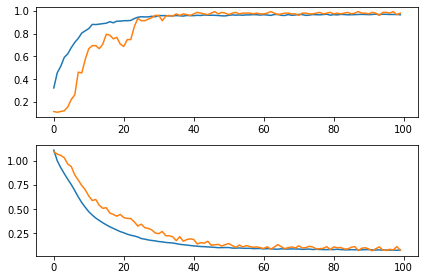

In [196]:
plot_train_vs_test(scores_dict)

In [197]:
scores_dict['val_accuracy'] 

0     0.113333
1     0.106667
2     0.113333
3     0.120000
4     0.153333
        ...   
95    0.986667
96    0.980000
97    0.993333
98    0.966667
99    0.980000
Length: 100, dtype: float64

In [207]:
scores_df.loc[99, ['acc6', 'val_acc6', 'loss6', 'val_loss6']]

acc6         0.977778
val_acc6     1.000000
loss6        0.065757
val_loss6    0.058210
Name: 99, dtype: float64